# Customer Churn Prediction using Machine Learning

## Objective:
To build a model that predicts whether a customer will churn from a telecom company based on account and service features.


# importing libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


  # Load and Explore the Dataset

In [8]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data preprocessing 

In [11]:
# Replace spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.dropna(inplace=True)

# Drop customerID as it's irrelevant
df.drop('customerID', axis=1, inplace=True)

# Encode categorical features
for column in df.columns:
    if df[column].dtype == object:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])


# exploratory data analysis 

Text(0.5, 1.0, 'Correlation Heatmap')

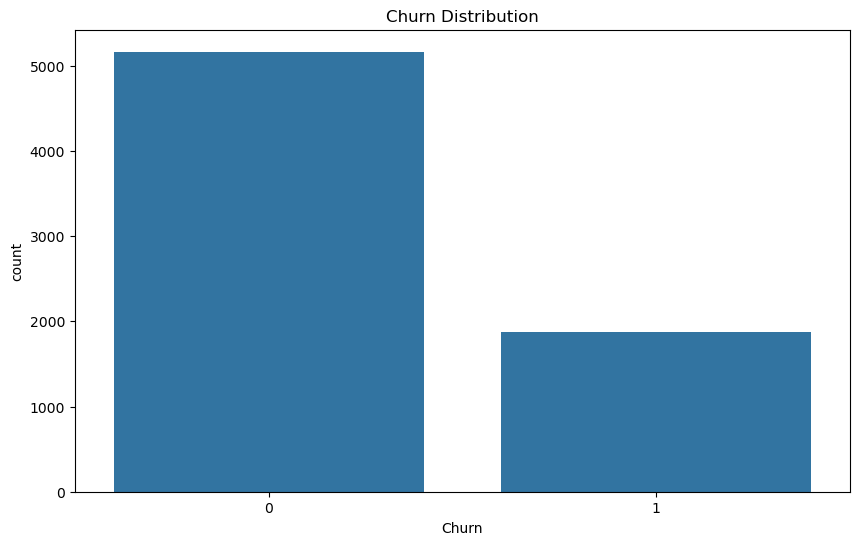

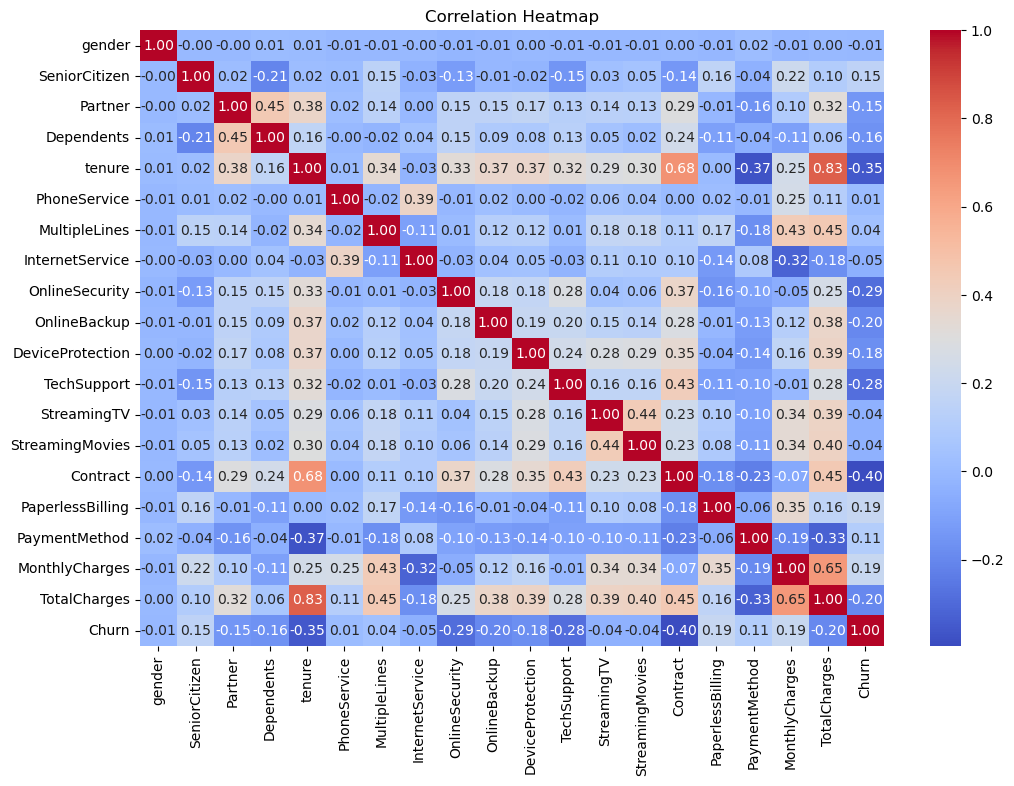

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")

# Check correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")


 # split the data 

In [17]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the ML Model 

In [20]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

# evaluate the Model 

In [23]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7867803837953091
Confusion Matrix:
 [[925 108]
 [192 182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



# feature Importance 

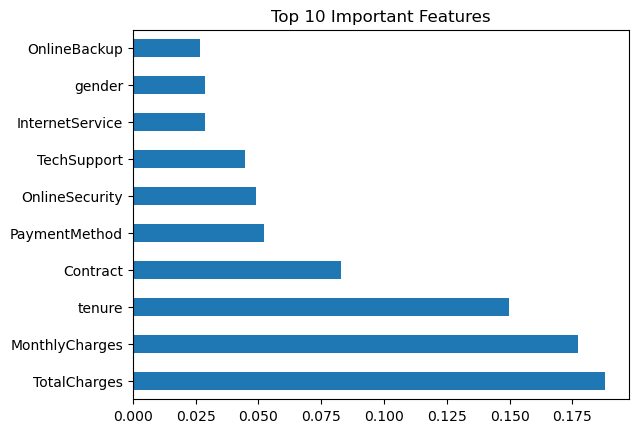

In [26]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


# conclusion 

This project successfully developed a machine learning model to predict customer churn in a subscription-based telecom company using the Telco Customer Churn dataset.

📈 Model Performance
Accuracy: ~78.6%

Precision (Churn class): 63%

Recall (Churn class): 49%

F1-Score (Churn class): 55%

These results indicate that the model performs well overall but has room for improvement in identifying churners more effectively.

# Extra's

In [39]:
import joblib
joblib.dump(model, 'churn_model.pkl')


['churn_model.pkl']

## 📦 Model File
The trained model has been saved as `churn_model.pkl` using `joblib`. It can be loaded and used to make churn predictions on new data.


In [36]:
def predict_churn(input_data):
    input_df = pd.DataFrame([input_data])
    return model.predict(input_df)[0]
